<a href="https://colab.research.google.com/github/TNH510/Artificial-Intelligence/blob/main/Viet_Nam_Food_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from os import listdir
from numpy import asarray

folder = '/content/drive/MyDrive/Food/Data/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Banh_chuoi'):
    output = 0
  if file.startswith('banh_da_lon'):
    output = 1
  if file.startswith('banh_xeo'):
    output = 2
  if file.startswith('Banhbao'):
    output = 3
  if file.startswith('Ca_kho_to'):
    output = 4
  if file.startswith('Nem_cuon'):
    output = 5
  if file.startswith('Oc_mong_tay'):
    output = 6
  if file.startswith('Rau_muong_xao'):
    output = 7
  if file.startswith('Thit_kho_trung'):
    output = 8
  if file.startswith('Xoitim'):
    output = 9

  
  photo = load_img(folder + file, target_size=(160,160))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Food/Food_photos.npy', photos)
save('/content/drive/MyDrive/Food/Food_labels.npy', labels)

(2979, 160, 160, 3) (2979,)


In [ ]:
import numpy as np

# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/Food/Food_photos.npy')
labels = np.load('/content/drive/MyDrive/Food/Food_labels.npy')
labels_one_hot = to_categorical(labels)


from sklearn.model_selection import train_test_split
x_trains, x_tests, y_trains, y_tests = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)

In [ ]:
#Build model
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.layers import ReLU
from keras.optimizers import Adam
from keras.optimizers import RMSprop
classes = 10

In [ ]:
model = Sequential()
#Convolutional
model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', input_shape= (160,160, 3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(512, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(1024, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(2048, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(2048, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(classes, activation= 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 160, 160, 128)     3584      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 80, 80, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 80, 80, 256)       295168    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 40, 40, 256)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 40, 40, 512)       1180160   
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 20, 20, 512)     

In [ ]:
#Tang cuong data
from keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.1,
    rescale=1./255,
	width_shift_range=0.1,
    height_shift_range=0.1,
	horizontal_flip=True,
    brightness_range=[0.2,1.5], fill_mode="nearest")


In [ ]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
train = model.fit(aug.flow(x_trains, y_trains, batch_size= 100),
                               epochs= 30)
test_loss, test_acc = model.evaluate(x_tests,y_tests)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/30
21/21 [==============================] - 47s 1s/step - loss: 3.0182 - accuracy: 0.1271
Epoch 2/30
21/21 [==============================] - 17s 815ms/step - loss: 2.2156 - accuracy: 0.1329
Epoch 3/30
21/21 [==============================] - 17s 818ms/step - loss: 2.0799 - accuracy: 0.1875
Epoch 4/30
21/21 [==============================] - 18s 811ms/step - loss: 1.8968 - accuracy: 0.2600
Epoch 5/30
21/21 [==============================] - 17s 812ms/step - loss: 1.8463 - accuracy: 0.2777
Epoch 6/30
21/21 [==============================] - 17s 804ms/step - loss: 1.7331 - accuracy: 0.3161
Epoch 7/30
21/21 [==============================] - 18s 826ms/step - loss: 1.6689 - accuracy: 0.3146
Epoch 8/30
21/21 [==============================] - 18s 827ms/step - loss: 1.6035 - accuracy: 0.3693
Epoch 9/30
21/21 [==============================] - 18s 841ms/step - loss: 1.4574 - accuracy: 0.4230
Epoch 10/30
21/21 [==============================] - 17s 817ms/step - loss: 1.4226 - accuracy:

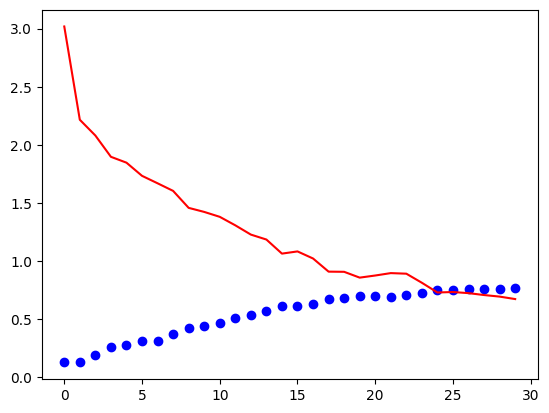

In [ ]:
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

In [ ]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
train = model.fit(aug.flow(x_trains, y_trains, batch_size= 128),
                               epochs= 30)
test_loss, test_acc = model.evaluate(x_tests,y_tests)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/30
17/17 [==============================] - 20s 1s/step - loss: 0.8032 - accuracy: 0.7376
Epoch 2/30
17/17 [==============================] - 18s 1s/step - loss: 0.6492 - accuracy: 0.7823
Epoch 3/30
17/17 [==============================] - 18s 1s/step - loss: 0.6281 - accuracy: 0.7851
Epoch 4/30
17/17 [==============================] - 20s 1s/step - loss: 0.5937 - accuracy: 0.7947
Epoch 5/30
17/17 [==============================] - 18s 1s/step - loss: 0.6222 - accuracy: 0.7827
Epoch 6/30
17/17 [==============================] - 19s 1s/step - loss: 0.5827 - accuracy: 0.8067
Epoch 7/30
17/17 [==============================] - 19s 1s/step - loss: 0.5379 - accuracy: 0.8201
Epoch 8/30
17/17 [==============================] - 19s 1s/step - loss: 0.5482 - accuracy: 0.8077
Epoch 9/30
17/17 [==============================] - 19s 1s/step - loss: 0.5226 - accuracy: 0.8216
Epoch 10/30
17/17 [==============================] - 18s 1s/step - loss: 0.5235 - accuracy: 0.8211
Epoch 11/30
17/17 [

In [ ]:
from keras.backend import categorical_crossentropy
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
train = model.fit(aug.flow(x_trains, y_trains, batch_size= 128),
                               epochs= 30)
test_loss, test_acc = model.evaluate(x_tests,y_tests)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/30
17/17 [==============================] - 21s 1s/step - loss: 0.5717 - accuracy: 0.8216
Epoch 2/30
17/17 [==============================] - 21s 1s/step - loss: 0.3324 - accuracy: 0.8815
Epoch 3/30
17/17 [==============================] - 21s 1s/step - loss: 0.2997 - accuracy: 0.8921
Epoch 4/30
17/17 [==============================] - 20s 1s/step - loss: 0.2617 - accuracy: 0.9122
Epoch 5/30
17/17 [==============================] - 21s 1s/step - loss: 0.2952 - accuracy: 0.9026
Epoch 6/30
17/17 [==============================] - 19s 1s/step - loss: 0.2793 - accuracy: 0.9007
Epoch 7/30
17/17 [==============================] - 21s 1s/step - loss: 0.3111 - accuracy: 0.8993
Epoch 8/30
17/17 [==============================] - 21s 1s/step - loss: 0.3274 - accuracy: 0.8878
Epoch 9/30
17/17 [==============================] - 21s 1s/step - loss: 0.3449 - accuracy: 0.8897
Epoch 10/30
17/17 [==============================] - 21s 1s/step - loss: 0.3128 - accuracy: 0.8974
Epoch 11/30
17/17 [

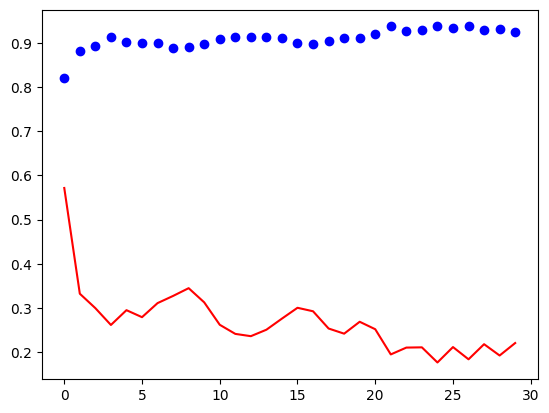

In [ ]:
from matplotlib import pyplot as plt
accuracy= train.history['accuracy']
loss= train.history['loss']
epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label= 'Training accuracy')
plt.plot(epochs, loss, 'r', label= 'Training loss')
plt.show()

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Food/Food.h5')

In [ ]:
from keras.backend import categorical_crossentropy
train = model.fit(aug.flow(x_trains, y_trains, batch_size= 128),
                               epochs= 30)
test_loss, test_acc = model.evaluate(x_tests,y_tests)
print("Accurency:", test_acc)
print('Loss:', test_loss)

Epoch 1/30
17/17 [==============================] - 55s 1s/step - loss: 0.1656 - accuracy: 0.9424
Epoch 2/30
17/17 [==============================] - 18s 1s/step - loss: 0.2149 - accuracy: 0.9309
Epoch 3/30
17/17 [==============================] - 18s 1s/step - loss: 0.2014 - accuracy: 0.9329
Epoch 4/30
17/17 [==============================] - 19s 1s/step - loss: 0.1745 - accuracy: 0.9372
Epoch 5/30
17/17 [==============================] - 18s 1s/step - loss: 0.1731 - accuracy: 0.9376
Epoch 6/30
17/17 [==============================] - 17s 1s/step - loss: 0.1756 - accuracy: 0.9362
Epoch 7/30
17/17 [==============================] - 19s 1s/step - loss: 0.1959 - accuracy: 0.9333
Epoch 8/30
17/17 [==============================] - 18s 1s/step - loss: 0.2101 - accuracy: 0.9314
Epoch 9/30
17/17 [==============================] - 18s 1s/step - loss: 0.1914 - accuracy: 0.9329
Epoch 10/30
17/17 [==============================] - 19s 1s/step - loss: 0.1658 - accuracy: 0.9410
Epoch 11/30
17/17 [

In [ ]:
#Save model
model.save('/content/drive/MyDrive/Food/Food.h5')

In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Food/Food.h5')

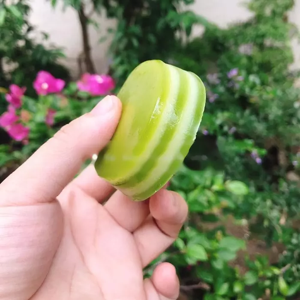

1/1 [==============================] - 0s 23ms/step
['Bánh da lợn']


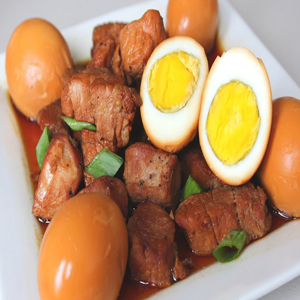

1/1 [==============================] - 0s 20ms/step
['Thịt kho trứng']


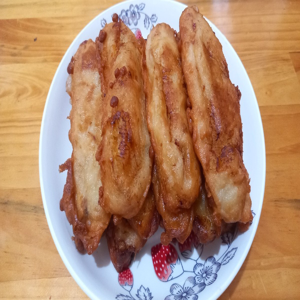

1/1 [==============================] - 0s 30ms/step
['Bánh chuối']


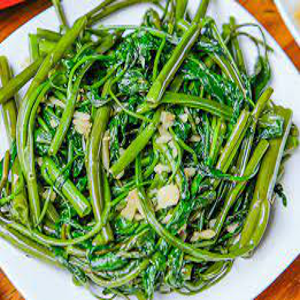

1/1 [==============================] - 0s 28ms/step
['Rau muống xào']


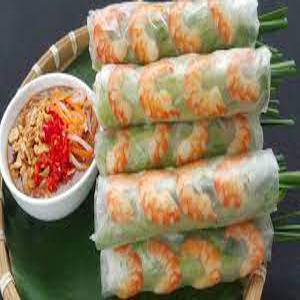

1/1 [==============================] - 0s 24ms/step
['Nem cuốn']


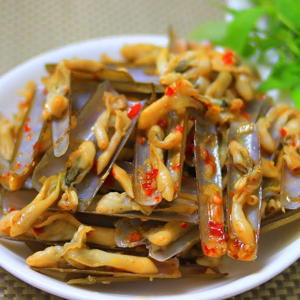

1/1 [==============================] - 0s 25ms/step
['Ốc móng tay']


In [ ]:
from PIL import Image
import numpy as np
import os

#Tạo mảng để chứa label
label = np.array(['Bánh chuối', 'Bánh da lợn', 'Bánh xèo', 'Bánh bao', 'Cá kho tộ', 
                  'Nem cuốn', 'Ốc móng tay', 'Rau muống xào', 'Thịt kho trứng', 'Xôi tím'])

# Kích thước mới của ảnh
new_size = (300, 300)
predict_size = (160, 160)

# Đường dẫn đến thư mục chứa ảnh trong Drive
path = '/content/drive/MyDrive/Food/Checking Data'
images = os.listdir(path)

# Đọc ảnh từ thư mục trên Drive và hiển thị chúng trên Colab
for image_name in images:
    # Đường dẫn đến file ảnh
    img_path = os.path.join(path, image_name)
    # Đọc ảnh
    if os.path.isfile(img_path):
      # Đọc ảnh
      img = Image.open(img_path)
      img_origin = Image.open(img_path)

      # Resize ảnh về kích thước mới
      img_origin = img.resize(new_size)
      img_origin.show()

      #Dự đoán
      img = img.resize(predict_size)
      img = img_to_array(img)
      img = img.reshape(1,160,160,3)
      img = img.astype('float32')/255
      max = np.argmax(model.predict(img), axis = 1)
      print(label[max])